In [202]:
#workhorses
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

#for custom colormaps
from matplotlib.colors import LinearSegmentedColormap

#for proxy artists for legends
import matplotlib.lines as mlines

import itertools

In [203]:
#plotting aesthetics

import matplotlib as mpl
from cycler import cycler

#All of Anandh's customized seaborn settings
sns.set_context("talk", font_scale=1.5, rc={"lines.linewidth": 1.5})
sns.set_style("ticks")
tw = 1.5
sns.set_style({"xtick.major.size": 3, "ytick.major.size": 3,
               "xtick.minor.size": 2, "ytick.minor.size": 2,
               'axes.labelsize': 16, 'axes.titlesize': 16,
               'xtick.major.width': tw, 'xtick.minor.width': tw,
               'ytick.major.width': tw, 'ytick.minor.width': tw,
              "xtick.direction": "in","ytick.direction": "in"})

#custom matplotlib params
mpl.rc('axes', prop_cycle=(cycler('color', ['r', 'k', 'b','g','y','m','c']) ))

mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

mpl.rc('xtick', labelsize=25) 
mpl.rc('ytick', labelsize=25)
mpl.rc('axes', linewidth=1.5)
mpl.rc('legend', fontsize=14)

## open data

In [204]:
directory = 'Z:/Reed/Projects/lab misc/echo_cfu_count/'

file_384 = '20200123 384 echo cfu test.xlsx'
file_1536 = '20200123 1536 echu cfu test.xlsx'
file_plate = 'petri plate cfu counts.xlsx'

datas = {x:pd.read_excel(directory + y, sheet_name=None) for x,y in zip(['384', '1536', 'plate'], [file_384, file_1536, file_plate])}

In [205]:
datas = {k : datas[k]['cfu_counts'] for k in datas.keys()}

## plot

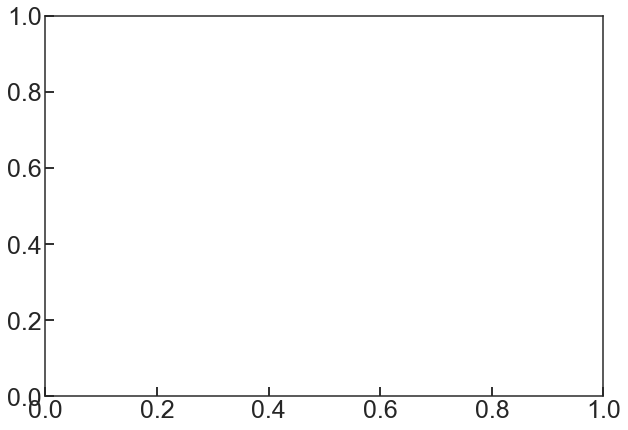

In [215]:
#create master figure
fig, ax = plt.subplots(figsize=(10,7))

In [216]:
#process 384 well data
df = datas['384']

conc_cols = [x for x in df.columns if '_cfumL' in x]

#replace 0 with nan and then log transform
for x in conc_cols:
    df[x] = df[x].replace(0, np.nan)
    df['log_' + x] = df[x].apply(np.log10)

#get rid of nans
df = df.dropna(axis='index')

In [217]:
#384 well shooting data

sns.pointplot(x='time', y='log_OD700_cfumL', data=df, ci=None, color='r', size=10, order=[0, 'ef', 'e'], ax=ax)

sns.stripplot(x='time', y='log_OD700_cfumL', data=df, color='r', order=[0, 'ef', 'e'], ax=ax)

In [218]:
#process 1536 well data
df = datas['1536']

conc_cols = [x for x in df.columns if '_cfumL' in x]

#replace 0 with nan and then log transform
for x in conc_cols:
    df[x] = df[x].replace(0, np.nan)
    df['log_' + x] = df[x].apply(np.log10)

#get rid of nans
df = df.dropna(axis='index')

In [219]:
#1536 well shooting data

sns.pointplot(x='time', y='log_OD700_cfumL', data=df, ci=None, color='b', order=[0, 'ef', 'e'], ax=ax)

sns.stripplot(x='time', y='log_OD700_cfumL', data=df, color='b', order=[0, 'ef', 'e'], ax=ax)

In [220]:
#process plated data
df = datas['plate']

for x in [y for y in df.columns if 'conc_b' in y]:
    df[x] = df[x].replace(0, np.nan)
    df['log_' + x] = df[x].apply(np.log10)
    
df = df.drop('notes', axis='columns')

nans = df['conc_b'].apply(np.isnan)
df = df.loc[~nans]

In [221]:
#plated data

sns.pointplot(x='time', y='log_conc_b', data=df, ci=None, color='g', order=[0, 'ef', 'e'], ax=ax)

sns.stripplot(x='time', y='log_conc_b', data=df, color='g', order=[0, 'ef', 'e'], ax=ax)

In [222]:
ax.set_xlabel('Time point')
ax.set_ylabel('Log CFU/mL')

fig.legend(labels=['echo 384', 'echo 1536', 'plating'], loc = (0.15, 0.65))

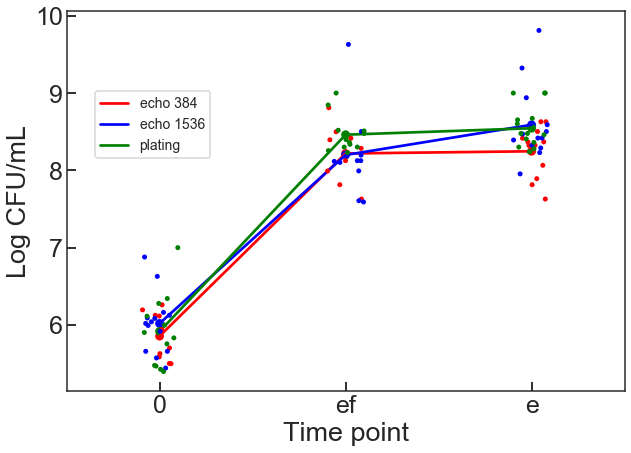

In [223]:
fig